In [60]:
import pandas as pd

In [61]:
model_mnist_data = pd.read_csv('train.csv')

In [62]:
model_mnist_data.shape

(42000, 785)

In [63]:
X= model_mnist_data.loc[:,model_mnist_data.columns != 'label']

In [64]:
y = model_mnist_data.label

In [65]:
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [66]:
import matplotlib.pyplot as plt

In [67]:
d = X.iloc[5,:]

In [68]:
d = d.reshape(28,28)


C:\Users\sabya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


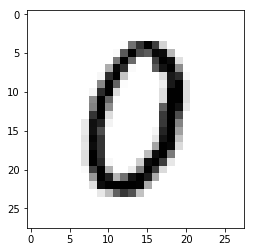

In [69]:
plt.imshow(255-d,cmap='gist_gray')
plt.show()

In [70]:
#Training the model

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 8, test_size = 0.2)

In [154]:
mlp_model = MLPClassifier(learning_rate='constant')
mlp_model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [155]:
y_predict = mlp_model.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
accuracy_score(y_test,y_predict)

0.9488095238095238

In [158]:
test = X_test.iloc[12,:]
test = test.reshape(28,28)

C:\Users\sabya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


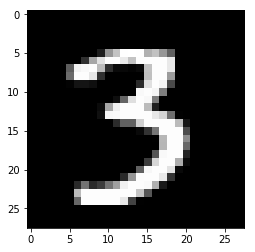

In [159]:
plt.imshow(test, cmap='gist_gray')
plt.show()

In [160]:
y_predict[12]

3

In [161]:
#Load the test dataset

In [162]:
test_set = pd.read_csv('test.csv')

In [163]:
test_image = test_set.iloc[345,:]
test_image= test_image.reshape(28,28)

C:\Users\sabya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


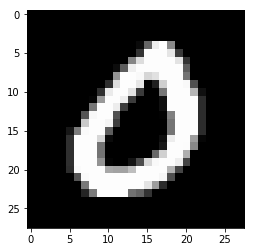

In [164]:
plt.imshow(test_image,cmap='gist_gray')
plt.show()

In [165]:
test_predict = mlp_model.predict(test_set)

In [166]:
test_predict[345]

0

In [167]:
test_set.shape

(28000, 784)

In [178]:
labelid = range(1,test_set.shape[0]+1)

In [179]:
submission = pd.DataFrame({'ImageId':labelid,'label':test_predict})

In [180]:
submission.to_csv('digit_recognizer.csv',index=False)

In [181]:
%pwd

'C:\\Users\\sabya\\datascience\\kaggle\\digit_recognizer'

In [182]:
pd.crosstab(y_test,y_predict)

col_0,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,824,0,2,0,0,1,15,1,7,2
1,0,936,1,5,0,0,2,1,4,0
2,7,7,760,11,2,0,3,8,18,1
3,5,1,11,795,0,33,0,1,20,4
4,4,3,2,1,714,0,15,1,6,17
5,4,0,0,6,2,702,15,3,8,5
6,4,0,0,0,1,5,833,2,4,0
7,2,4,10,1,2,1,0,857,4,10
8,1,10,4,9,1,7,7,1,770,8
